In [1]:
import torch
from time import time

In [2]:
a = torch.ones(1000)
b = torch.ones(1000)

In [3]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.011996030807495117


In [4]:
start = time()
d = a + b
print(time() - start)

0.00021004676818847656


In [5]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


In [6]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [7]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size = labels.size()))

In [8]:
print(features[0], labels[0])

tensor([ 0.3868, -0.1064], dtype=torch.float64) tensor(5.3350, dtype=torch.float64)


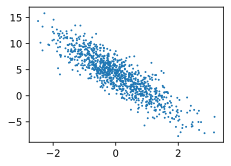

In [9]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [10]:
def data_iter(batch_size, features ,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i : min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0,j)

In [11]:
batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break

tensor([[-0.4550,  1.5631],
        [-0.5824,  0.0387],
        [ 0.0932,  0.6317],
        [ 0.0396, -0.8738],
        [-0.7634,  0.1854],
        [ 0.2918,  0.3168],
        [ 2.7759, -0.6274],
        [ 0.3868, -0.1064],
        [-1.7848, -0.3868],
        [-0.4862,  0.4860]], dtype=torch.float64) tensor([-2.0177,  2.9083,  2.2514,  7.2583,  2.0541,  3.6966, 11.8792,  5.3350,
         1.9447,  1.5716], dtype=torch.float64)


In [12]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float64)
b = torch.zeros(1, dtype=torch.float64)

In [13]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], dtype=torch.float64, requires_grad=True)

In [14]:
def linreg(X, w, b):
    ans = torch.mm(X, w) + b
    return ans

In [15]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [16]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [17]:
lr = 0.03
num_epochs = 3
net =linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print("epoch %d, loss %f" % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.049092
epoch 2, loss 0.000215
epoch 3, loss 0.000050


In [18]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0007],
        [-3.3984]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1992], dtype=torch.float64, requires_grad=True)


In [66]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype = torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

# 用更简洁的方法建立网络

In [67]:
import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

In [68]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[ 0.0083,  1.7266],
        [ 1.4272,  0.8127],
        [-1.1033, -1.0448],
        [-0.2604, -0.3358],
        [-1.5805, -1.5277],
        [-0.1524, -0.6217],
        [ 0.5219,  1.2453],
        [-0.3774, -1.4115],
        [-0.0441,  0.1454],
        [ 0.6133, -0.5141]]) tensor([-1.6533,  4.3128,  5.5280,  4.8251,  6.2253,  5.9960,  1.0151,  8.2441,
         3.6174,  7.1591])


In [69]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [70]:
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    #可传入其他层
    )
print(net)

net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
#net.add_module...
print(net)

from collections import OrderedDict
net = nn.Sequential(OrderedDict([
        ('linear', nn.Linear(num_inputs, 1))
        #...
    ]))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [71]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.1500, -0.2942]], requires_grad=True)
Parameter containing:
tensor([-0.0684], requires_grad=True)


In [72]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [73]:
loss = nn.MSELoss()

In [74]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [75]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.303371
epoch 2, loss: 0.008498
epoch 3, loss: 0.000261


In [77]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 2.0004, -3.3904]], requires_grad=True)
Parameter containing:
tensor([4.1912], requires_grad=True)


# 3.8 多层感知机

In [3]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append("./code")
import d2lzh_pytorch as d2l

In [9]:
def xyplot(x_vals, y_vals, name):
    d2l.set_figsize((5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

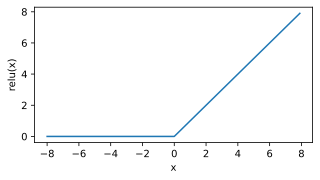

In [10]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

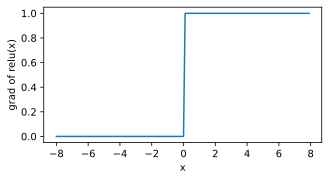

In [11]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

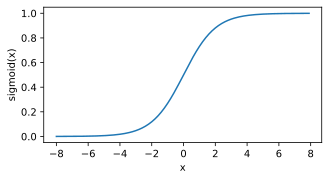

In [24]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

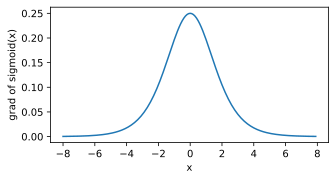

In [25]:
x.grad.data.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

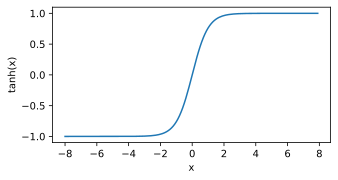

In [29]:
y = x.tanh()
xyplot(x, y, 'tanh')

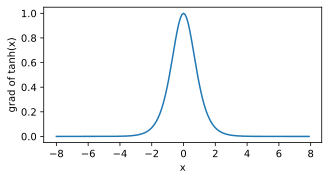

In [30]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

# 3.9 MLP的从零实现

In [2]:
import torch
import numpy as np
import sys
sys.path.append('./code')
import d2lzh_pytorch as d2l

In [3]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad = True

In [5]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

In [9]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

In [10]:
loss = torch.nn.CrossEntropyLoss()

In [11]:
num_epochs, lr = 5, 100.0
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.709, test acc 0.718
epoch 2, loss 0.0019, train acc 0.821, test acc 0.811
epoch 3, loss 0.0016, train acc 0.846, test acc 0.796
epoch 4, loss 0.0015, train acc 0.855, test acc 0.806
epoch 5, loss 0.0014, train acc 0.863, test acc 0.837


# 3.10 MLP简洁实现

In [1]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
sys.path.append('./code')
import d2lzh_pytorch as d2l
import torch.nn.functional as F


In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

#net = nn.Sequential(
#        d2l.FlattenLayer(),
#        nn.Linear(num_inputs, num_hiddens),
#        nn.ReLU(),
#        nn.Linear(num_hiddens, num_outputs),
#        )

class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens):
        super(MLP, self).__init__()
        self.flat = d2l.FlattenLayer()
        self.linear1 = nn.Linear(num_inputs, num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens, num_outputs)
    def forward(self, x):
        x = self.flat(x)
        h = self.linear1(x)
        h = self.relu(h)
        o = self.linear2(h)
        return o

net = MLP(num_inputs, num_outputs, num_hiddens)
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

In [3]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0020, train acc 0.809, test acc 0.847
epoch 2, loss 0.0015, train acc 0.860, test acc 0.863
epoch 3, loss 0.0013, train acc 0.875, test acc 0.860
epoch 4, loss 0.0013, train acc 0.881, test acc 0.866
epoch 5, loss 0.0012, train acc 0.885, test acc 0.861


# 3.11模型选择、欠拟合和过拟合

In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("./code")
import d2lzh_pytorch as d2l

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] +
         true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [3]:
features[:2], poly_features[:2], labels[:2]

(tensor([[0.8597],
         [0.5809]]),
 tensor([[0.8597, 0.7392, 0.6355],
         [0.5809, 0.3374, 0.1960]]),
 tensor([7.0823, 5.6497]))

In [4]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [5]:
num_epochs, loss = 100, torch.nn.MSELoss()
def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0])
    datasets = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(datasets, batch_size, shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight', net.weight.data,
         '/nbias:', net.bias.data)

final epoch: train loss 7.019788608886302e-05 test loss 8.602697198512033e-05
weight tensor([[ 1.1985, -3.4004,  5.6006]]) /nbias: tensor([4.9994])


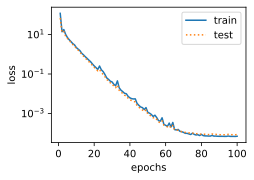

In [6]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
            labels[:n_train], labels[n_train:])

final epoch: train loss 370.38409423828125 test loss 215.53262329101562
weight tensor([[21.4589]]) /nbias: tensor([-0.8466])


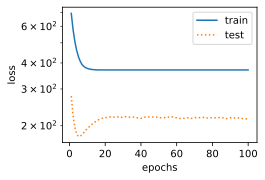

In [7]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.42836183309555054 test loss 16.363449096679688
weight tensor([[ 3.4159, -0.9536,  5.7438]]) /nbias: tensor([1.6321])


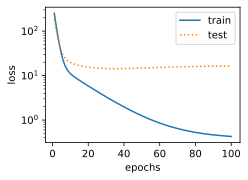

In [10]:
fit_and_plot(poly_features[:4, :], poly_features[n_train:, :], labels[:4], labels[n_train:])

# 3.12 权重衰减

In [1]:
#matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append('./code')
import d2lzh_pytorch as d2l

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train], features[n_train:]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [2]:
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    return [w, b]

In [3]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [4]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 13.767855644226074


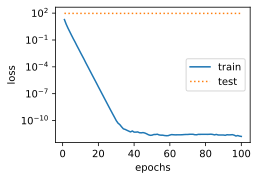

In [5]:
fit_and_plot(lambd=0)

L2 norm of w: 0.6207749843597412


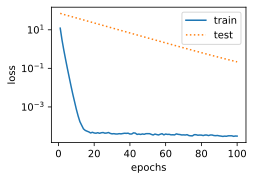

In [6]:
fit_and_plot(lambd=0.5)

L2 norm of w: 0.06761085242033005


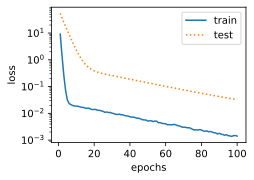

In [7]:
fit_and_plot(lambd=3)

In [8]:
def fit_and_plot_pytorch(wd):
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params = [net.weight], lr=lr, weight_decay=wd)
    optimizer_b = torch.optim.SGD(params = [net.bias], lr=lr)
    
    train_ls, test_ls= [], []
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y)
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w', net.weight.data.norm().item())

L2 norm of w: 13.078107833862305


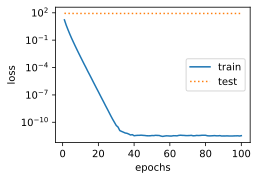

In [9]:
fit_and_plot(0)

L2 norm of w: 0.08727584779262543


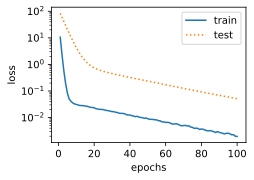

In [10]:
fit_and_plot(3)

# 3.13 丢弃法

In [11]:
#matplotlib inline
import torch
import numpy as np
import sys
import torch.nn as nn
sys.path.append('./code')
import d2lzh_pytorch as d2l

def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()
    return mask * X / keep_prob

In [12]:
X = torch.arange(16).view(2, 8)
dropout(X, 0)

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

In [13]:
dropout(X, 0.5)

tensor([[ 0.,  2.,  4.,  6.,  8.,  0.,  0., 14.],
        [ 0., 18.,  0., 22., 24., 26., 28., 30.]])

In [14]:
dropout(X, 1)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, num_hiddens1)), dtype=torch.float, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1, num_hiddens2)), dtype=torch.float, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2, num_outputs)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3]

In [16]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training:
        H1 = dropout(H1, drop_prob1)
    H2 = (torch.matmul(H1, W2) + b2).relu()
    if is_training:
        H2 = dropout(H2, drop_prob2)
    return torch.matmul(H2, W3) + b3

In [17]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        if isinstance(net, torch.nn.Module):
            net.eval()
            acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
            net.train()
        else:
            if('is_training' in net.__code__.covarnames):
                acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item()
            else:
                acc_sum += (net(X).argmax(dim=1) == y).float.sum().item()
        n += y.shape[0]
    return acc_sum / n

In [18]:
num_epochs, lr, batch_size = 5, 100.0, 256
loss = torch.nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0048, train acc 0.530, test acc 0.758
epoch 2, loss 0.0023, train acc 0.780, test acc 0.763
epoch 3, loss 0.0019, train acc 0.819, test acc 0.827
epoch 4, loss 0.0018, train acc 0.836, test acc 0.764
epoch 5, loss 0.0017, train acc 0.844, test acc 0.838


In [20]:
net = nn.Sequential(
    d2l.FlattenLayer(),
    nn.Linear(num_inputs, num_hiddens1),
    nn.ReLU(),
    nn.Dropout(drop_prob1),
    nn.Linear(num_hiddens1, num_hiddens2),
    nn.ReLU(),
    nn.Dropout(drop_prob2),
    nn.Linear(num_hiddens2, 10)
    )

for param in net.parameters():
    nn.init.normal_(param, mean=0, std=0.01)

In [21]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0044, train acc 0.573, test acc 0.721
epoch 2, loss 0.0022, train acc 0.790, test acc 0.815
epoch 3, loss 0.0019, train acc 0.823, test acc 0.828
epoch 4, loss 0.0017, train acc 0.838, test acc 0.794
epoch 5, loss 0.0016, train acc 0.850, test acc 0.800


# KAGGLE房价预测

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import sys
sys.path.append('./code')
import d2lzh_pytorch as d2l
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
print(torch.__version__)
torch.set_default_tensor_type(torch.FloatTensor)

1.8.1


In [2]:
train_data = pd.read_csv('./data/kaggle_house/train.csv')
test_data = pd.read_csv('./data/kaggle_house/test.csv')

In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [6]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [7]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
all_features = all_features.fillna(0)

In [8]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 354)

In [9]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float)
train_labels = torch.tensor(train_data.iloc[:, -1].values, dtype=torch.float).view(-1, 1)

In [10]:
loss = torch.nn.MSELoss()
def get_net(feature_num):
    net = nn.Linear(feature_num, 1)
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net

In [16]:
def log_rmse(net, features, labels):
    with torch.no_grad():
        clipped_preds = torch.max(net(features), torch.tensor(1.0))
        rmse = torch.sqrt(2 * loss(clipped_preds.log(), labels.log()))
    return rmse.item()

In [17]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    net = net.float()
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [18]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part), dim=0)
            y_train = torch.cat((y_train, y_part), dim=0)
    return X_train, y_train, X_valid, y_valid

In [19]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net(X_train.shape[1])
        train_ls, valid_ls = train(net, *data, num_epochs,learning_rate, weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse', 
                         range(1, num_epochs + 1), valid_ls, ['train', 'valid'])
        print('flod %d, train rmse %f, valid rmse %f' % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

In [27]:
def train_and_pred(train_features, test_features, train_labels, test_data,num_epochse, lr, weight_decay,batch_size):
    net = get_net(train_features.shape[-1])
    train_ls, _ = train(net, train_features, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).detach().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('./submission.csv', index=False)

train rmse 0.230003


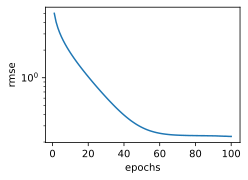

In [28]:
train_and_pred(train_features, test_features,train_labels, test_data, num_epochs, lr, weight_decay, batch_size)